## importer les packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# classification

In [2]:
diabete=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
diabete['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## contenue du dataset: description des variables

Pregnancies: nombres de grosses

Glucose: taux de glucose

BloodPressure: pression arterielle

SkinThickness: epaisseur du pli cutanee du triceps

Insulin: taux d'insuline

BMI	: indice de masse corporel

DiabetesPedigreeFunction: une fonction qui determine le risque de diabete de type 2 en fonction des antecedants familiaux. plus la foction est grande plus risque de diabete de type 2 est eleve

Age: age du patient

Outcome: resultat sur le diagnostique du diabete de type 2( target)

## objectif :
construire un modele de classification pour predire si un patient a le diabete de type 2 en fonction des features si dessus

In [5]:
# informations generales sur le dataset
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Description des donnees

In [6]:
# afficher les statistiques descriptives du dataset
diabete.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#  analyse des valeurs manquantes
diabete.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
x=diabete.drop('Outcome', axis=1)
y=diabete['Outcome']

In [10]:
# decoupae du dataset
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
# entrainement du modele d'arbre de decision
tree=DecisionTreeClassifier(random_state=42)
tree.fit(x_train,y_train)
col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

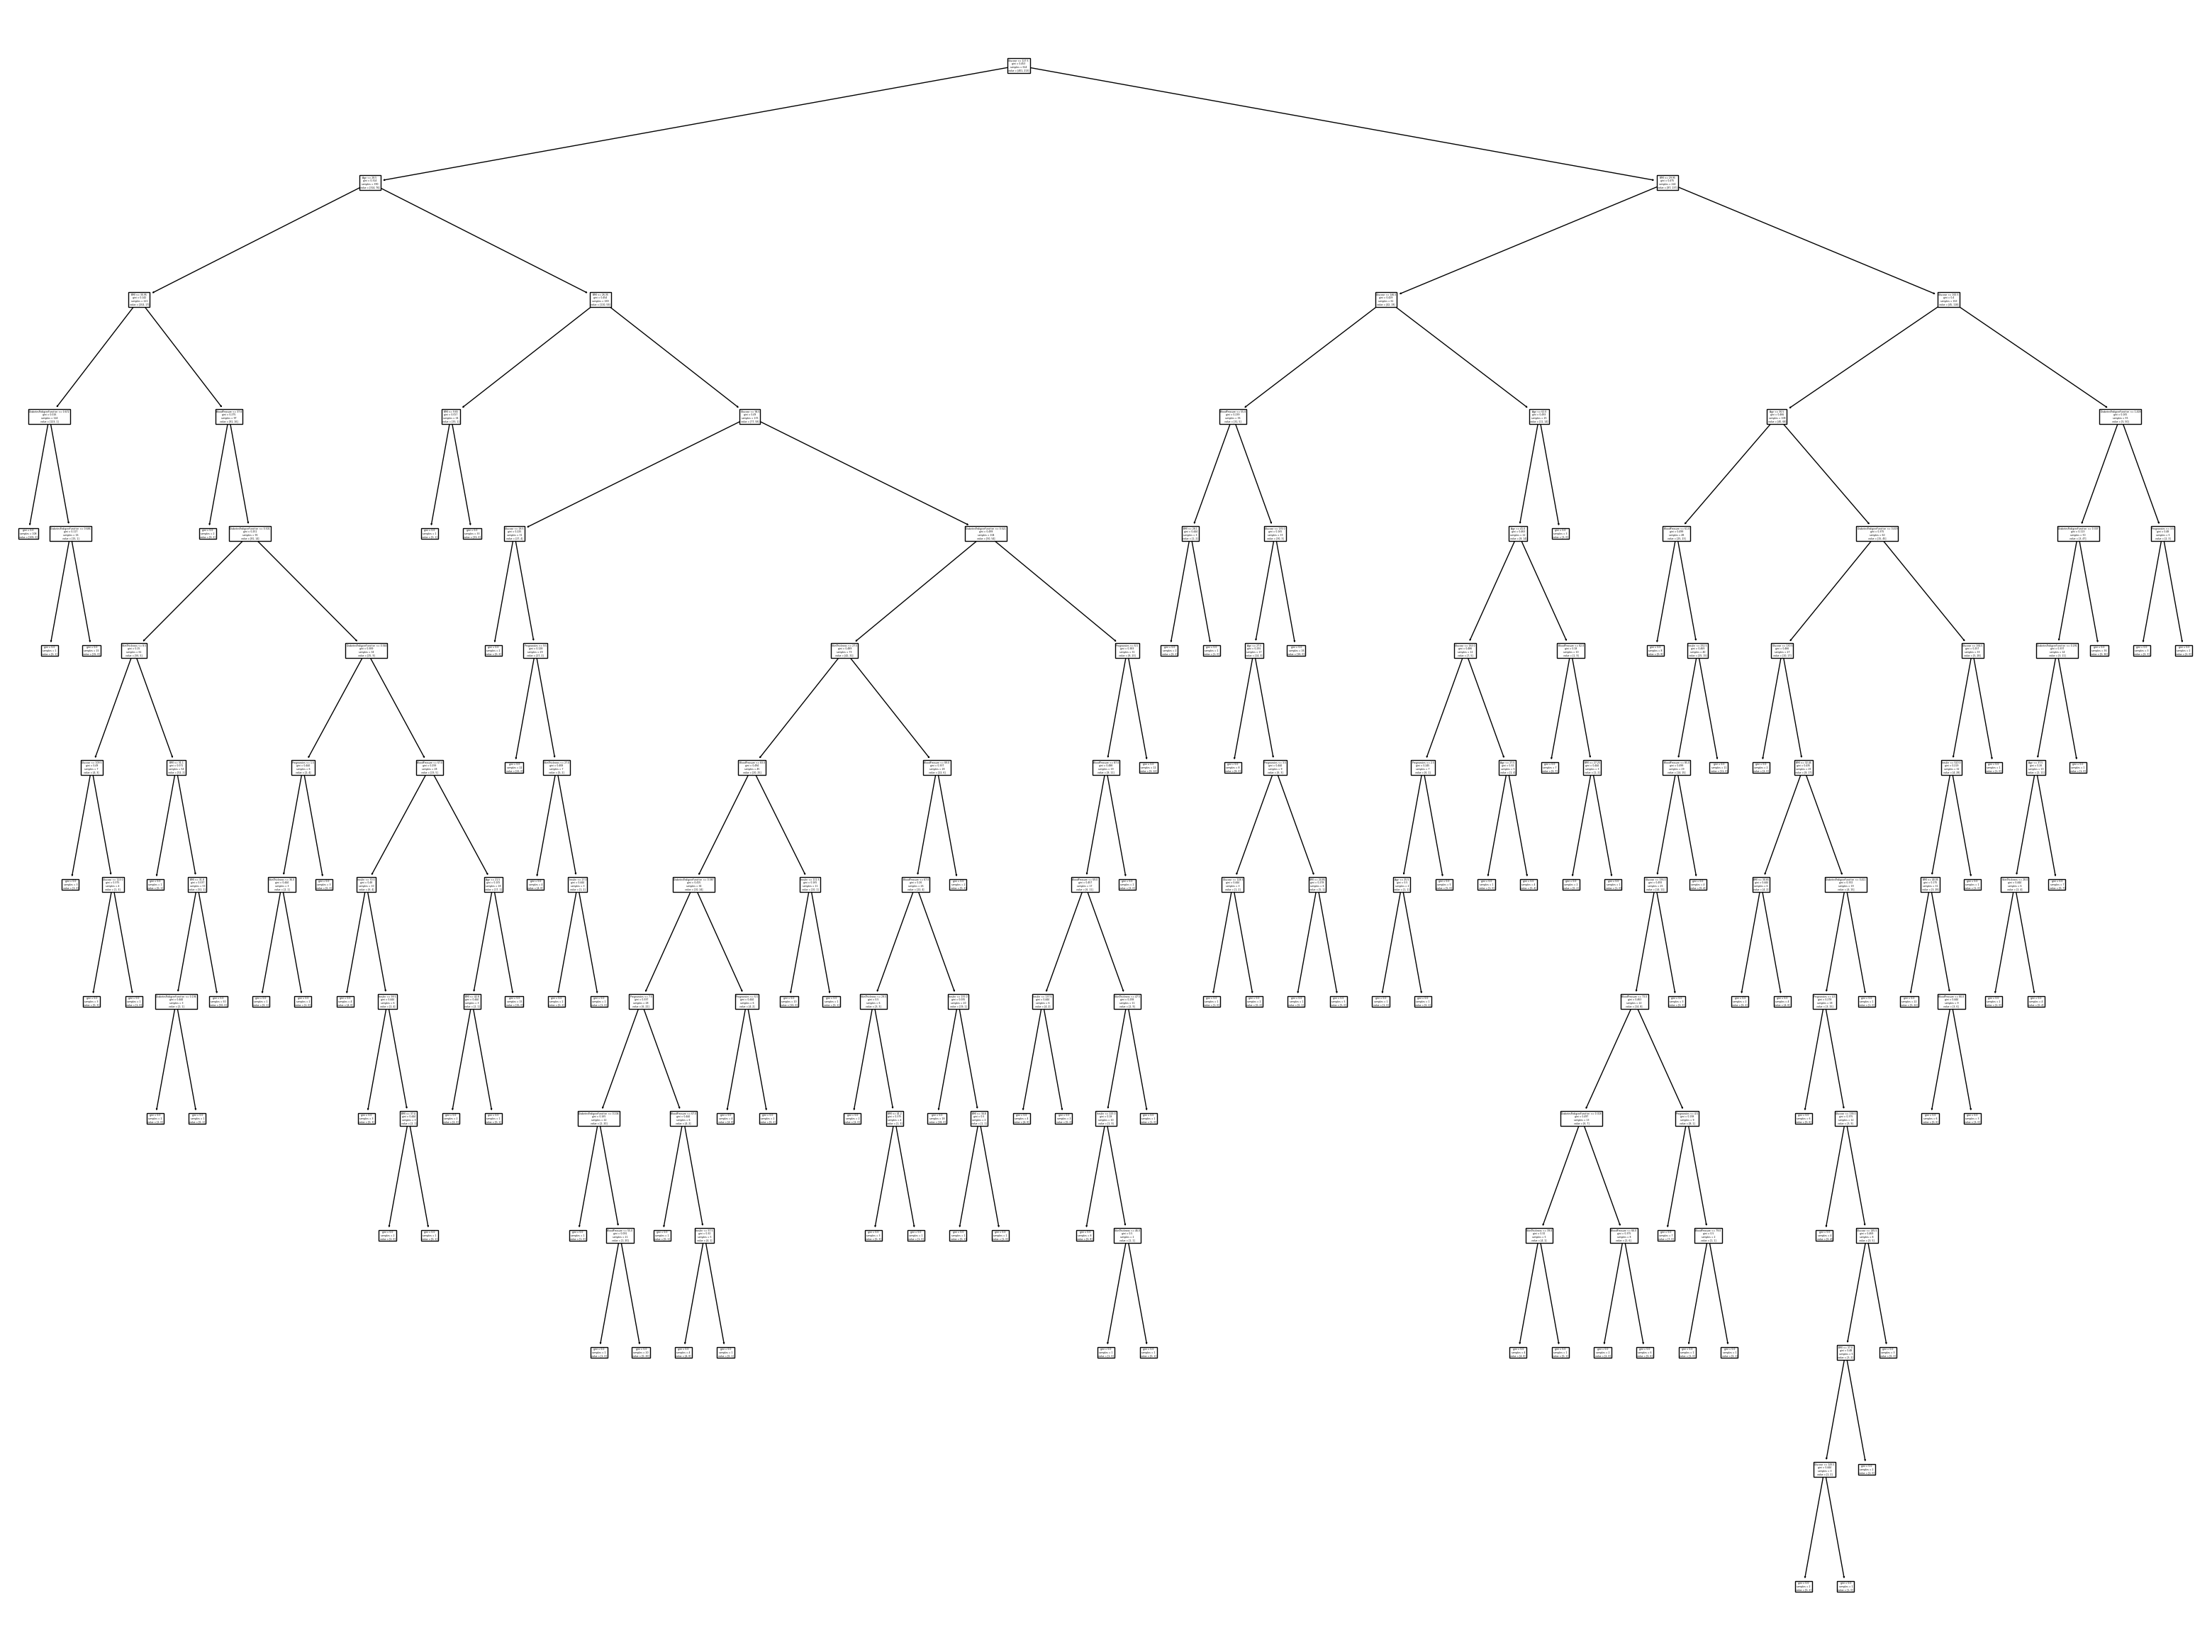

In [12]:
plt.figure(figsize=(40,30))
plot_tree(tree, feature_names=col)
plt.show()

In [13]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# cross validation
param_grid={'max_depth':range(1,15),'splitter':['best','random']}
grid=GridSearchCV(tree,param_grid,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 15),
                         'splitter': ['best', 'random']})

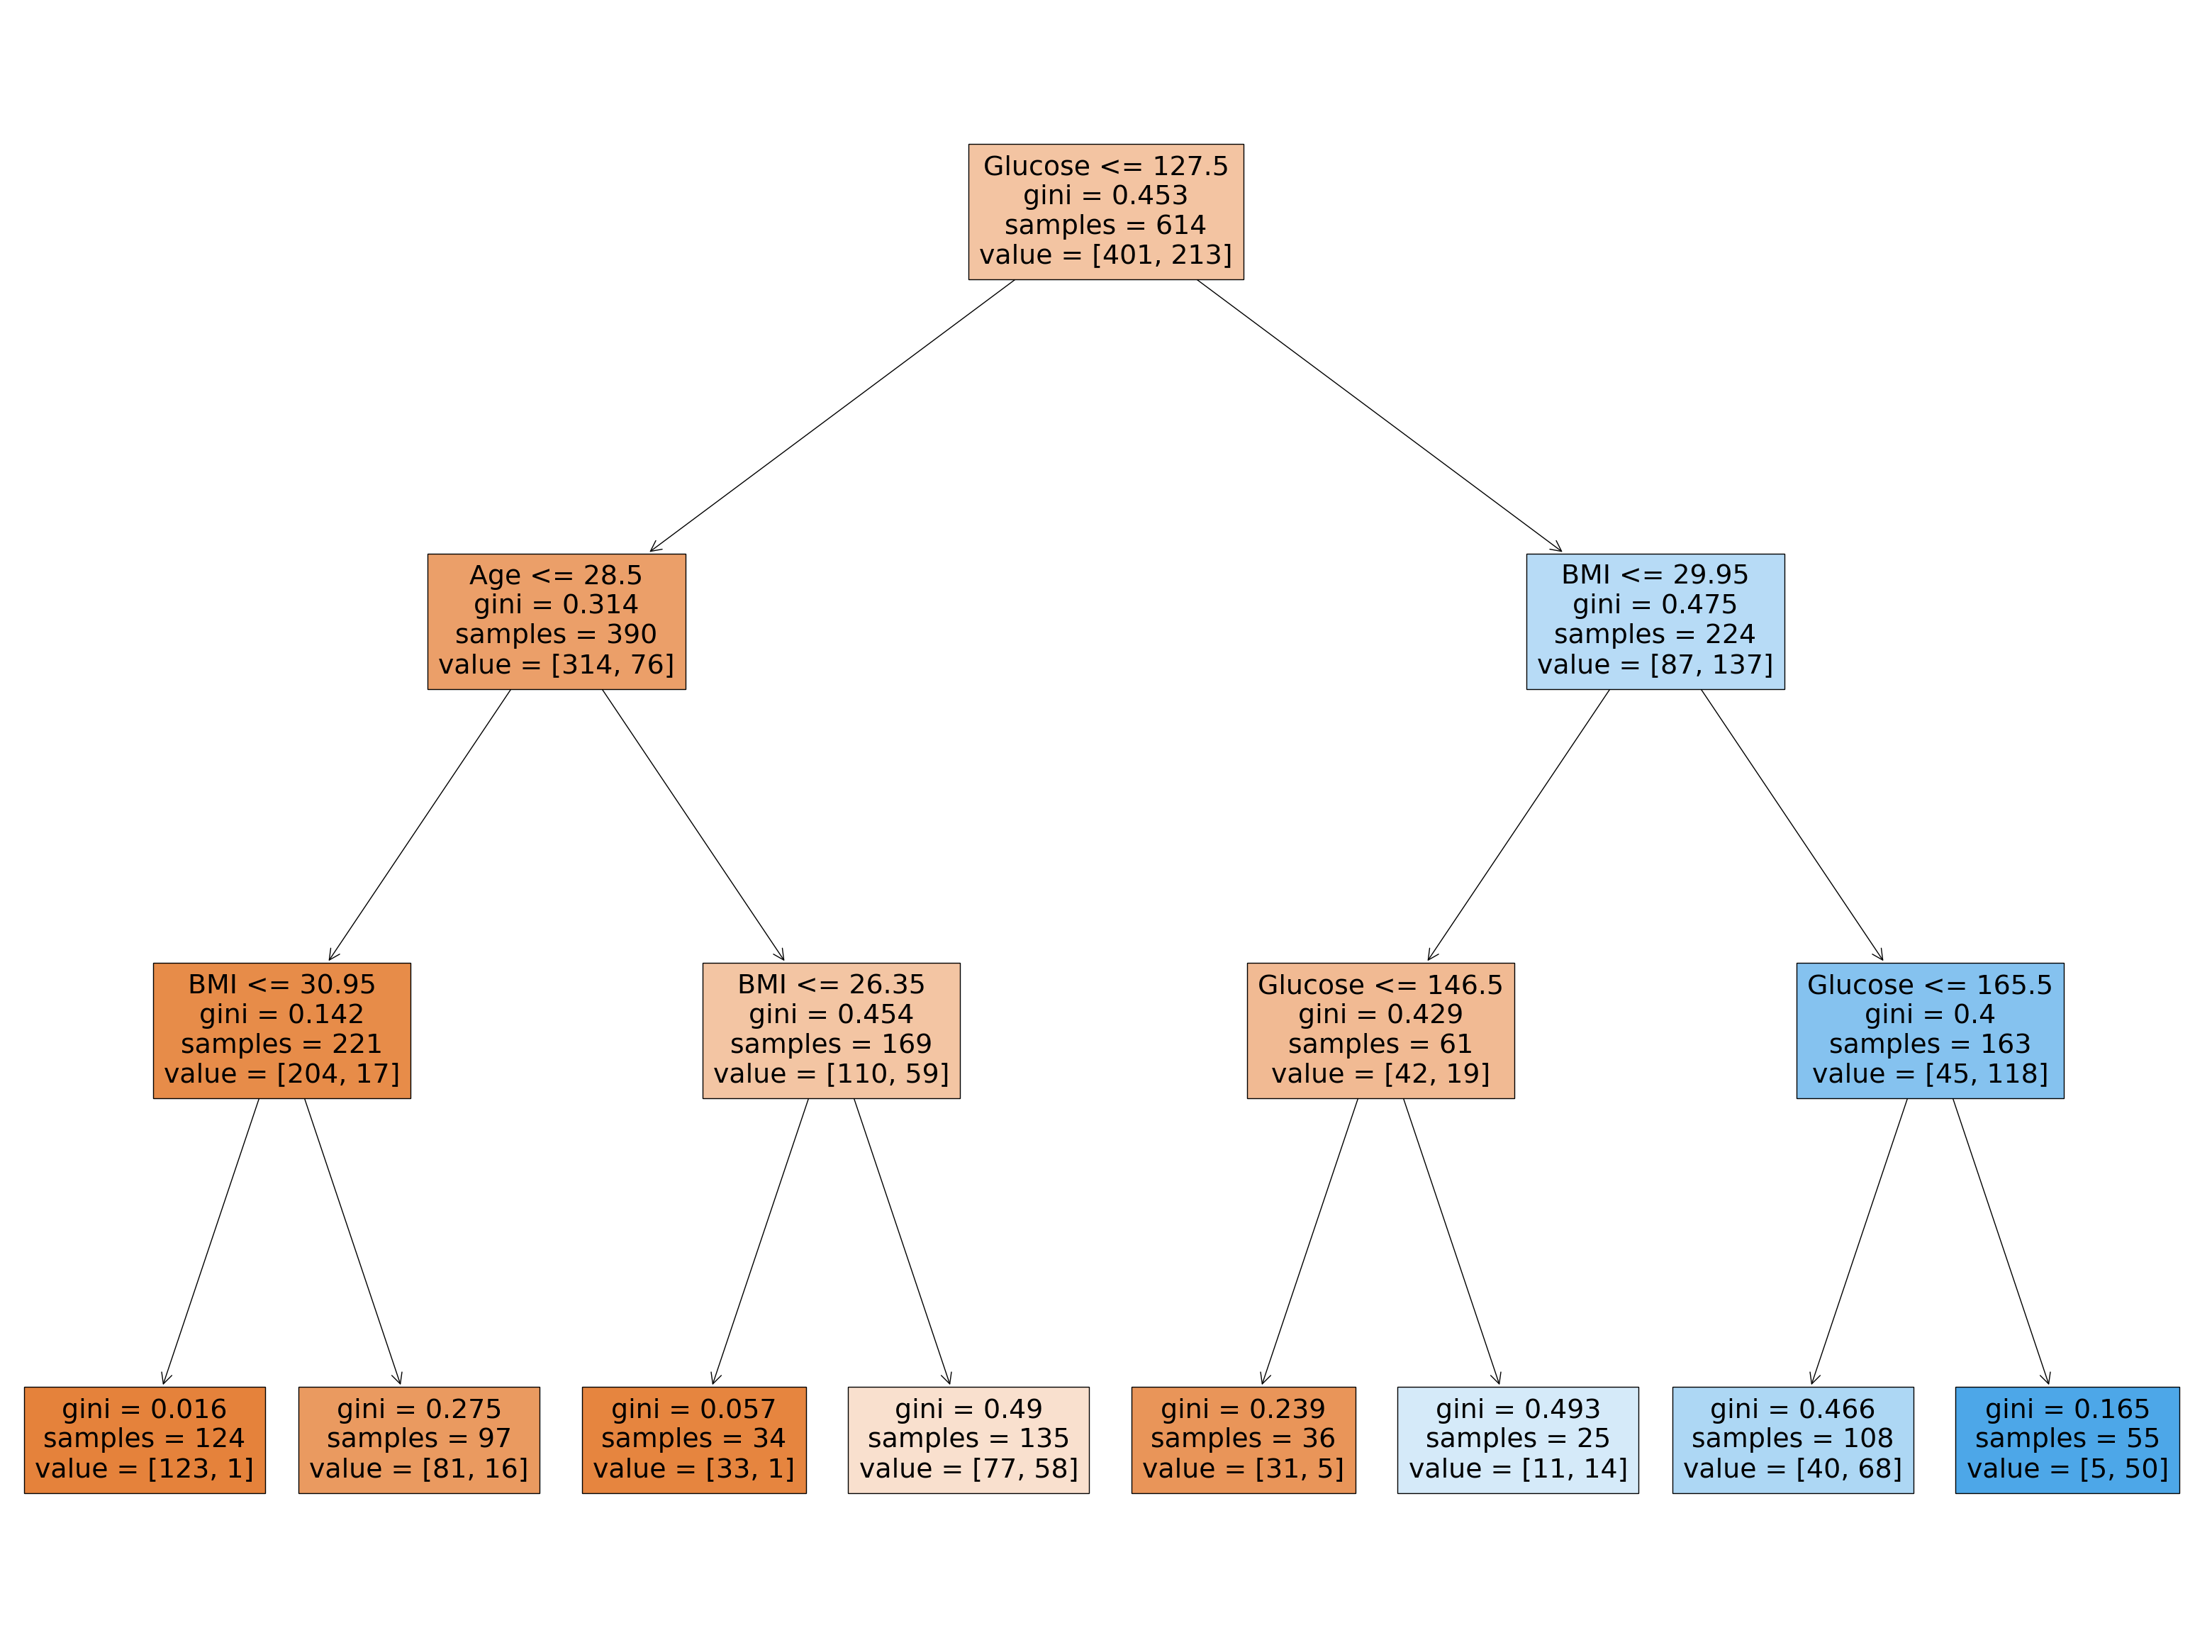

In [14]:
grid.best_score_
tree=grid.best_estimator_
# afficher l'arbre de decision construit sans elagage

plt.figure(figsize=(40,30))
plot_tree(tree, feature_names=col,filled=True)
plt.show()